In [1]:
# Execute this to get wide display
from IPython.display import display, HTML
display(HTML("""<style>#notebook-container{width:100%;margin:20px;padding:20px}</style>"""))

In [62]:
DC_HOME_DIR = "/private/home/tianluwang/data_characterization"

from text_characterization.analysis import (
    show_pairwise_metric_correlations,
    PredictFromCharacteristicsAnalysis,
)
from text_characterization.utils import load_text_metrics

In [3]:
import pandas as pd
import json

In [4]:
"""
Read the text characteristics we computed before. To understand what kind of texts this data comes from, here's some context:

In this work we analyze the behavior of a coreference model on sentences contains different occupations and pronouns. 
The model needs to find out the two spans referring to the same person. More details can be found here (https://github.com/kentonl/e2e-coref).
We use the WinoBias dataset (https://uclanlp.github.io/corefBias/overview) which is designed to expose gender bias in coreference resolution systems.

Here is an example of the texts we extracted from the evaluation logs:
"""
with open(f"{DC_HOME_DIR}/examples/coref_bias/winobias_text_features_anti.jsonl") as f:
    for line in f:
        print(line)
        break
        
with open(f"{DC_HOME_DIR}/examples/coref_bias/winobias_text_features_pro.jsonl") as f:
    for line in f:
        print(line)
        break

{"id": 0, "token1": "The developer", "token2": "she"}

{"id": 0, "token1": "The developer", "token2": "he"}



In [24]:
"""
We computed characterisics for these texts using the winobias metric config.
"""
metrics_anti_df = load_text_metrics(f"{DC_HOME_DIR}/examples/coref_bias/winobias_text_features_anti.tsv.tmp")
metrics_pro_df = load_text_metrics(f"{DC_HOME_DIR}/examples/coref_bias/winobias_text_features_pro.tsv.tmp")

In [32]:
print(metrics_anti_df.columns.tolist())
metrics_anti_df

['WORD_PROPERTY_Genderness', 'text_key']


,WORD_PROPERTY_Genderness,text_key
id,,
0,80.0,token1
0,0.0,token2
1,46.0,token1
1,100.0,token2
2,96.0,token1
...,...,...
393,100.0,token2
394,66.0,token1
394,0.0,token2


In [47]:
pivot_df_anti = metrics_anti_df.pivot(columns="text_key")
print(pivot_df_anti.columns.tolist())
pivot_df_anti['abs_diff'] = abs(pivot_df_anti[('WORD_PROPERTY_Genderness', 'token1')] -  pivot_df_anti[('WORD_PROPERTY_Genderness', 'token2')])
pivot_df_anti

[('WORD_PROPERTY_Genderness', 'token1'), ('WORD_PROPERTY_Genderness', 'token2')]


WORD_PROPERTY_Genderness        abs_diff
text_key                   token1 token2         
id                                               
0                            80.0    0.0     80.0
1                            46.0  100.0     54.0
2                            96.0    0.0     96.0
3                            28.0  100.0     72.0
4                            82.0    0.0     82.0
..                            ...    ...      ...
391                          20.0  100.0     80.0
392                          73.0    0.0     73.0
393                          16.0  100.0     84.0
394                          66.0    0.0     66.0
395                          39.0  100.0     61.0

[396 rows x 3 columns]

In [45]:
pivot_df_pro = metrics_pro_df.pivot(columns="text_key")
print(pivot_df_pro.columns.tolist())
pivot_df_pro['abs_diff'] = abs(pivot_df_pro[('WORD_PROPERTY_Genderness', 'token1')] -  pivot_df_pro[('WORD_PROPERTY_Genderness', 'token2')])
pivot_df_pro

[('WORD_PROPERTY_Genderness', 'token1'), ('WORD_PROPERTY_Genderness', 'token2')]


WORD_PROPERTY_Genderness        abs_diff
text_key                   token1 token2         
id                                               
0                            80.0  100.0     20.0
1                            46.0    0.0     46.0
2                            96.0  100.0      4.0
3                            28.0    0.0     28.0
4                            82.0  100.0     18.0
..                            ...    ...      ...
391                          20.0    0.0     20.0
392                          73.0  100.0     27.0
393                          16.0    0.0     16.0
394                          66.0  100.0     34.0
395                          39.0    0.0     39.0

[396 rows x 3 columns]

In [48]:
df_merged = pivot_df_anti.append(pivot_df_pro, ignore_index=True)
print(df_merged)
print(df_merged.columns.tolist())

         WORD_PROPERTY_Genderness        abs_diff
text_key                   token1 token2         
0                            80.0    0.0     80.0
1                            46.0  100.0     54.0
2                            96.0    0.0     96.0
3                            28.0  100.0     72.0
4                            82.0    0.0     82.0
..                            ...    ...      ...
787                          20.0    0.0     20.0
788                          73.0  100.0     27.0
789                          16.0    0.0     16.0
790                          66.0  100.0     34.0
791                          39.0    0.0     39.0

[792 rows x 3 columns]
[('WORD_PROPERTY_Genderness', 'token1'), ('WORD_PROPERTY_Genderness', 'token2'), ('abs_diff', '')]


/tmp/ipykernel_1597415/1779782371.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = pivot_df_anti.append(pivot_df_pro, ignore_index=True)


In [55]:
new_df = pd.DataFrame({
    "id": df_merged.index,
    "abs_diff": df_merged["abs_diff"],
    "text_key": ["Adsolute gender difference between occupation and pronouns" for _ in range(len(df_merged))]
})

new_df.set_index("id", inplace=True)
new_df

,abs_diff,text_key
id,,
0,80.0,Adsolute gender difference between occupation ...
1,54.0,Adsolute gender difference between occupation ...
2,96.0,Adsolute gender difference between occupation ...
3,72.0,Adsolute gender difference between occupation ...
4,82.0,Adsolute gender difference between occupation ...
...,...,...
787,20.0,Adsolute gender difference between occupation ...
788,27.0,Adsolute gender difference between occupation ...
789,16.0,Adsolute gender difference between occupation ...


In [33]:
#obtained by https://github.com/kentonl/e2e-coref 
outcomes_pro = [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
outcomes_anti = [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

In [34]:
outcomes_df = pd.DataFrame(outcomes_anti+outcomes_pro, columns=['Model Accuracy'])
outcomes_df

,Model Accuracy
0,0
1,0
2,0
3,1
4,1
...,...
787,1
788,1
789,0
790,1


In [57]:
"""
Load the characteristics and the outcomes into our analysis tool. We will use the default logistic regression for predicting model performance.
"""

predictive_analysis = PredictFromCharacteristicsAnalysis(
    new_df,
    outcomes_df,
    model_type="logistic_regression"
)

Analysis initialized! There are:
 1 features available
 594 samples for fitting a predictive model
 198 to evaluate the fit.


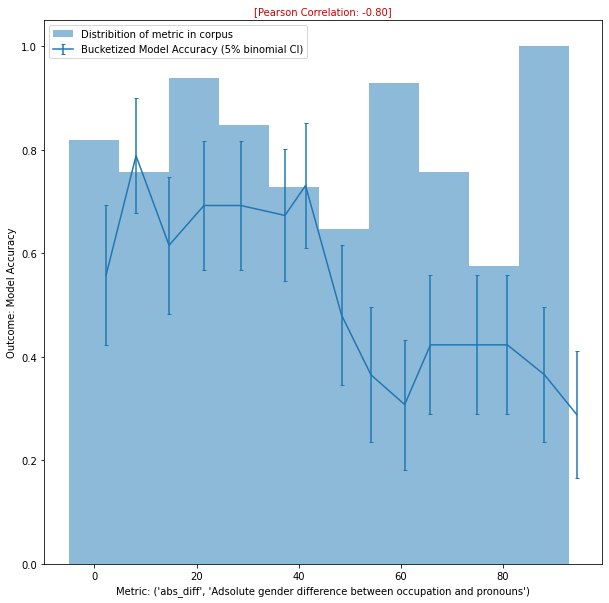

In [63]:
"""
First, let's take a look at how model accuracy looks like across segments of our data if we sort it data by data characteristics.

"""

predictive_analysis.show_individual_metric_correlations(
    data_points_per_bucket=50,
    figsize=(10, 10),
    fontsize=10,
    savefig_path="./"
)